In [1]:
import sympy
sp = sympy
import numpy as np
from scipy.integrate import odeint,RK45,solve_ivp
import matplotlib.pyplot as plt

In [2]:
def Riccati_solution(a,b,c,tau,init_val):
    g = sp.sqrt(b**2 - 4.0*a*c)
    ex = sp.exp(g*tau) - 1
    num = 2*g*init_val + ((b+g)*init_val+2*c)*ex
    denom = 2*g - (2*a*init_val+b-g)*ex
    return num/denom

def Riccati_solution_vec(a,b,c,tau,init_val):
    n = len(a)
    res = np.zeros(n)
    for i in range(n):
        res[i] = Riccati_solution(a[i],b[i],c[i],tau,init_val[i])
    return res
    
def int_Riccati_solution(a,b,c,tau,ricc_init_val):
    g = sp.sqrt(b**2 - 4.0*a*c)
    ex = sp.exp(g*tau) - 1
    term1 = (-b+g)*tau/(2.0*a) 
    term2 = sp.log(2*g/sp.Abs(2*g+(g-b-2*a*ricc_init_val)*ex))/a
    return term1 + term2

def int_Riccati_solution_vec(a,b,c,tau,ricc_init_val):
    n = len(a)
    res = np.zeros(n)
    for i in range(n):
#        print(int_Riccati_solution(a[i],b[i],c[i],tau,ricc_init_val[i]))
        res[i] = int_Riccati_solution(a[i],b[i],c[i],tau,ricc_init_val[i])
    return res


In [3]:
a, b, c, tau, init_val = sp.symbols("a b c tau init_val")

In [4]:
Riccati_solution(a,b,c,tau,init_val)

(4.0*init_val*sqrt(-a*c + 0.25*b**2) + (2*c + init_val*(b + 2.0*sqrt(-a*c + 0.25*b**2)))*(exp(2.0*tau*sqrt(-a*c + 0.25*b**2)) - 1))/(4.0*sqrt(-a*c + 0.25*b**2) - (exp(2.0*tau*sqrt(-a*c + 0.25*b**2)) - 1)*(2*a*init_val + b - 2.0*sqrt(-a*c + 0.25*b**2)))

In [5]:
grad = lambda y,t,a,b,c: [a*y[0]*y[0] + b*y[0] + c]
# grad = lambda y,t,a,b,c: a*y*y + b*y + c
y0 = [1.0]
# grad = lambda y,t,a,b,c: a*y**2 + b*y + c
# y0 = 1.0
t = np.linspace(0, 30, 100)
args = (0.005,-0.25,2) # a,b,c need to put realistic numbers
# sol= odeint(grad, y0, t, args=args)
grad_RK45 = lambda t,y: grad(y,t,*args)
# sol= solve_ivp(grad_RK45,[t[0],t[-1]], y0,t_eval=[t[0],t[-1]])
sol= solve_ivp(grad_RK45,[t[0],t[-1]], y0, t_eval=t,rtol = 1e-5,first_step=1e-8)
sol

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 121
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0.        ,  0.3030303 ,  0.60606061,  0.90909091,  1.21212121,
        1.51515152,  1.81818182,  2.12121212,  2.42424242,  2.72727273,
        3.03030303,  3.33333333,  3.63636364,  3.93939394,  4.24242424,
        4.54545455,  4.84848485,  5.15151515,  5.45454545,  5.75757576,
        6.06060606,  6.36363636,  6.66666667,  6.96969697,  7.27272727,
        7.57575758,  7.87878788,  8.18181818,  8.48484848,  8.78787879,
        9.09090909,  9.39393939,  9.6969697 , 10.        , 10.3030303 ,
       10.60606061, 10.90909091, 11.21212121, 11.51515152, 11.81818182,
       12.12121212, 12.42424242, 12.72727273, 13.03030303, 13.33333333,
       13.63636364, 13.93939394, 14.24242424, 14.54545455, 14.84848485,
       15.15151515, 15.45454545, 15.75757576, 16.06060606, 16.36363636,
       16.66666667, 16.969696

In [6]:
Riccati_solution(*args,sol.t[-1],y0[0])

9.92289389208465

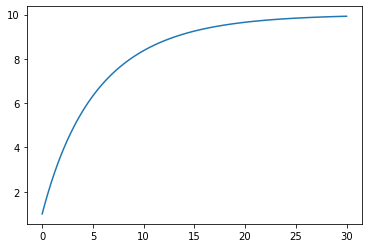

In [7]:
plt.plot(sol.t,sol.y.reshape(-1))

In [8]:
grad = lambda y,t,a,b,c,init_val: [Riccati_solution(a,b,c,t,init_val)]
# grad = lambda y,t,a,b,c: a*y*y + b*y + c
y0 = [1.0]
# grad = lambda y,t,a,b,c: a*y**2 + b*y + c
# y0 = 1.0
t = np.linspace(0, 10, 100)
# args = (0.005,-0.25,2) # a,b,c need to put realistic numbers
sol= odeint(grad, 0.0, t, args=args+(y0[0],))

In [16]:
t[-1]

10.0

In [10]:
int_Riccati_solution(*args,t[-1],y0[0])

58.1000686349332

In [11]:
# How to compute a Chf
# US parameters
# for treasury param
l0 = -0.127061
# presume constant shift
ve = np.array([0.2715618,0.0195524,0.0009720])
ka = np.array([5.6772530,0.2520333,0.147])
th = ve/ka
si = np.array([0.0181427,0.0422960,0.034]) # adjusted si[2]
xi = np.array([0.05095958,0.06725220,0.00961570])
# Equity parameters (US LC, OS)
mu0 = np.array([0.000815,0.000822])
mu1 = np.array([-0.5,-0.5])
v0 = np.array([0.019528084,0.080837794])
alp = np.array([0.022,0.108045])
beta = np.array([0.98803,1.284485])
sigma = np.array([0.142303,0.121922]) # volatility of variance

# sA vA sB vB
# correlation parameters
sAvA = -0.5
sAsB = 0.5
sAvB = -0.5
vAsB = -0.5
vAvB = 0.5
sBvB = -0.5
correlation = np.matrix([[1,sAvA,sAsB,sAvB],[sAvA,1,vAsB,vAvB],[sAsB,vAsB,1,sBvB],[sAvB,vAvB,sBvB,1]]) 
if np.all(np.linalg.eigvals(correlation) < 0):
    print('Correlation matrix is not positive definite!')
L = np.linalg.cholesky(correlation) # Cholesky decomposition of the correlation for simulation

In [12]:
# test
tau = t[-1]
u = np.array([1.0, 1.0]) # uA uB

# compute Bi (treasury parameter)
Bi_param = {'a':0.5*si**2,'b':-ka,'c':sum(u)*np.ones(len(ka)),'init_val':xi}
Bi = Riccati_solution_vec(Bi_param['a'],Bi_param['b'],Bi_param['c'],tau,Bi_param['init_val'])
int_Bi = int_Riccati_solution_vec(Bi_param['a'],Bi_param['b'],Bi_param['c'],tau,Bi_param['init_val'])

# compute Ci for variance process
# heston model's parameter
Ci_param = {'a':0.5*sigma**2, 'b':(u*np.array([sAvA,sBvB])*sigma-beta), 'c':0.5*u**2+u*mu1,'init_val':v0}
Ci = Riccati_solution_vec(Ci_param['a'],Ci_param['b'],Ci_param['c'],tau,Ci_param['init_val'])


In [13]:
Bi_com = np.zeros((len(t),3))
for i,elem in enumerate(t):
    Bi_com[i,:] = Riccati_solution_vec(Bi_param['a'],Bi_param['b'],Bi_param['c'],elem,Bi_param['init_val'])
Bi_com

array([[5.09595800e-02, 6.72522000e-02, 9.61570000e-03],
       [1.82465760e-01, 2.65034867e-01, 2.10002626e-01],
       [2.56579408e-01, 4.57855158e-01, 4.07440922e-01],
       [2.98348145e-01, 6.45844130e-01, 6.01978460e-01],
       [3.21888074e-01, 8.29129063e-01, 7.93662213e-01],
       [3.35154664e-01, 1.00783359e+00, 9.82538273e-01],
       [3.42631427e-01, 1.18207779e+00, 1.16865187e+00],
       [3.46845171e-01, 1.35197836e+00, 1.35204739e+00],
       [3.49219947e-01, 1.51764866e+00, 1.53276840e+00],
       [3.50558320e-01, 1.67919884e+00, 1.71085767e+00],
       [3.51312599e-01, 1.83673599e+00, 1.88635716e+00],
       [3.51737694e-01, 1.99036415e+00, 2.05930809e+00],
       [3.51977269e-01, 2.14018448e+00, 2.22975090e+00],
       [3.52112288e-01, 2.28629531e+00, 2.39772531e+00],
       [3.52188382e-01, 2.42879226e+00, 2.56327032e+00],
       [3.52231267e-01, 2.56776829e+00, 2.72642421e+00],
       [3.52255436e-01, 2.70331381e+00, 2.88722458e+00],
       [3.52269057e-01, 2.83551

In [14]:
trap_Bi = []
for i in range(Bi_com.shape[1]):
    trap_Bi.append(np.trapz(Bi_com[:,i], x=t))
trap_Bi

[3.4683428019000004, 51.18284070836391, 65.49753590419161]

In [15]:
int_Bi

array([ 3.46978941, 51.18437817, 65.49881376])